In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the datasets**

In [ ]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

 **Preview the data**

In [ ]:
print("\n--- Data Preview ---")
print("Customers dataset sample:")
print(customers.head())
print("\nProducts dataset sample:")
print(products.head())
print("\nTransactions dataset sample:")
print(transactions.head())


--- Data Preview ---
Customers dataset sample:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products dataset sample:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions dataset sample:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-

**Exploratory Data Analysis (EDA)**

In [ ]:
# Step 1: Understanding the Data
print("\n--- Dataset Information ---")
print("Customers dataset info:")
customers.info()
print("\nProducts dataset info:")
products.info()
print("\nTransactions dataset info:")
transactions.info()

# Checking for missing values
print("\n--- Checking for Missing Values ---")
print("Customers missing values:")
print(customers.isnull().sum())
print("Products missing values:")
print(products.isnull().sum())
print("Transactions missing values:")
print(transactions.isnull().sum())



--- Dataset Information ---
Customers dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Products dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Transactions dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total

In [ ]:
# Step 2: Data Cleaning
print("\n--- Data Cleaning ---")
# Removing duplicate entries (if any)
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

print("Data after removing duplicates:")
print(f"Customers: {len(customers)} rows")
print(f"Products: {len(products)} rows")
print(f"Transactions: {len(transactions)} rows")


--- Data Cleaning ---
Data after removing duplicates:
Customers: 200 rows
Products: 100 rows
Transactions: 1000 rows


In [ ]:
# Step 3: Merging the Data
print("\n--- Merging Datasets ---")
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


--- Merging Datasets ---



--- Exploratory Data Analysis ---
Analyzing customer distribution by region...


<ipython-input-27-cff815be70f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='Purples')


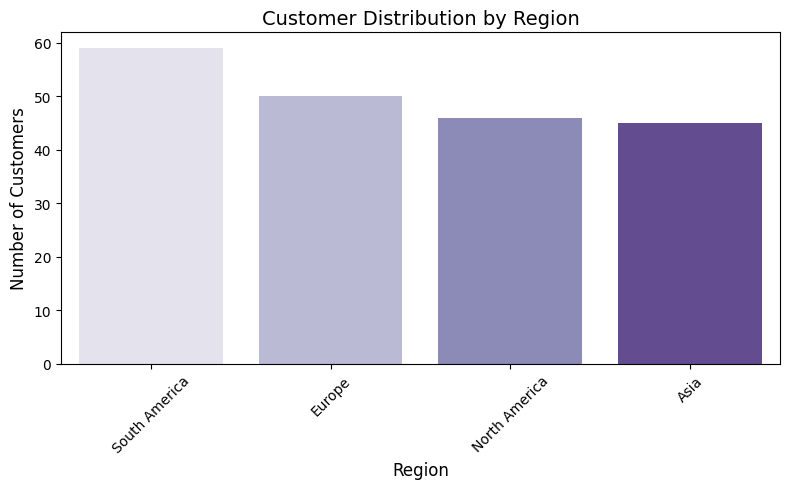

In [ ]:
# Step 4: Analyzing the Data
print("\n--- Exploratory Data Analysis ---")

# Customer distribution by region
print("Analyzing customer distribution by region...")
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='Purples')
plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Customer_Distribution_Region.png')
plt.show()

Analyzing product popularity...


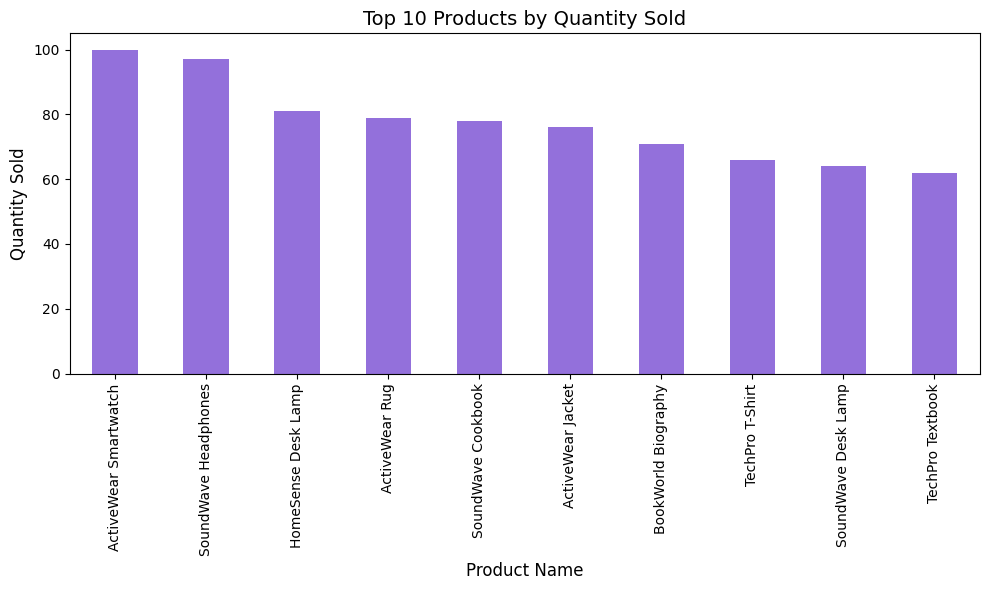

In [ ]:
# Product popularity analysis
print("Analyzing product popularity...")
product_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_sales.head(10).plot(kind='bar', color='mediumpurple')
plt.title("Top 10 Products by Quantity Sold", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.tight_layout()
plt.savefig('Top_Products.png')
plt.show()

Analyzing monthly revenue trends...


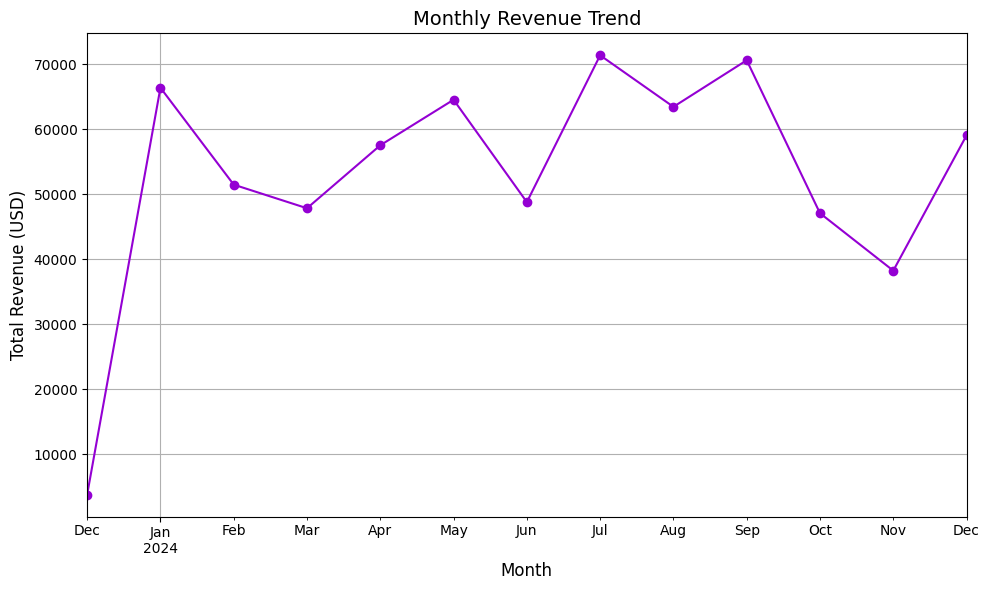

In [ ]:
# Monthly revenue trends
print("Analyzing monthly revenue trends...")
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_revenue = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_revenue.plot(marker='o', linestyle='-', color='darkviolet')
plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('Monthly_Revenue_Trend.png')
plt.show()

Analyzing top customers by revenue...


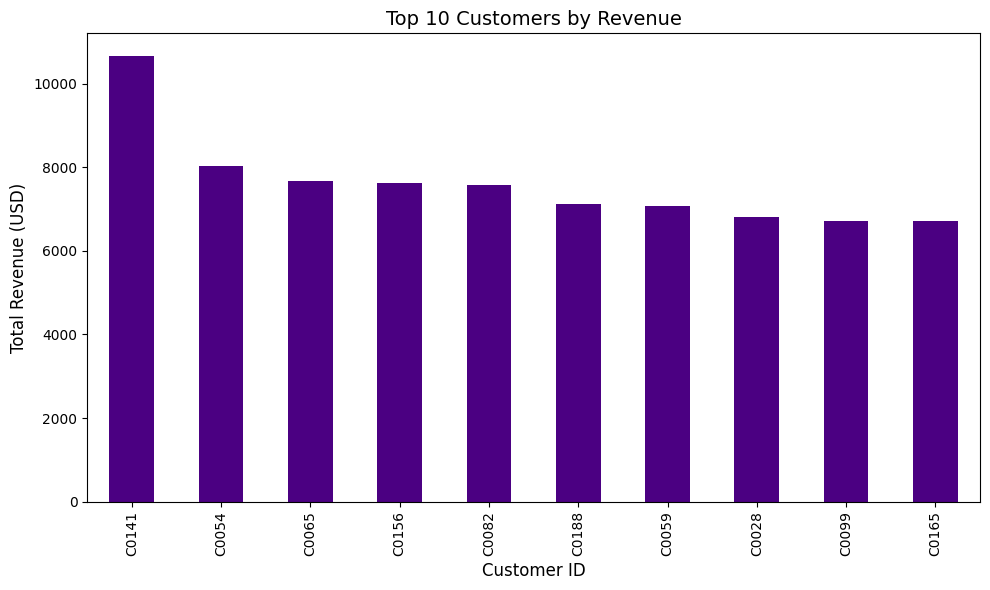

In [ ]:
# Top customers by revenue
print("Analyzing top customers by revenue...")
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
customer_revenue.head(10).plot(kind='bar', color='indigo')
plt.title("Top 10 Customers by Revenue", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.tight_layout()
plt.savefig('Top_Customers_Revenue.png')
plt.show()


**Business Insights**


--- Advanced Insights ---
Insight 1: The region with the highest number of customers is South America, contributing 59 customers.
Insight 2: The top-performing product is 'ActiveWear Smartwatch', selling 100 units.
Insight 3: The highest revenue was recorded in 2024-07, suggesting seasonal purchasing behavior.
Insight 4: The average transaction value is approximately $690.00, which can serve as a benchmark for revenue optimization strategies.


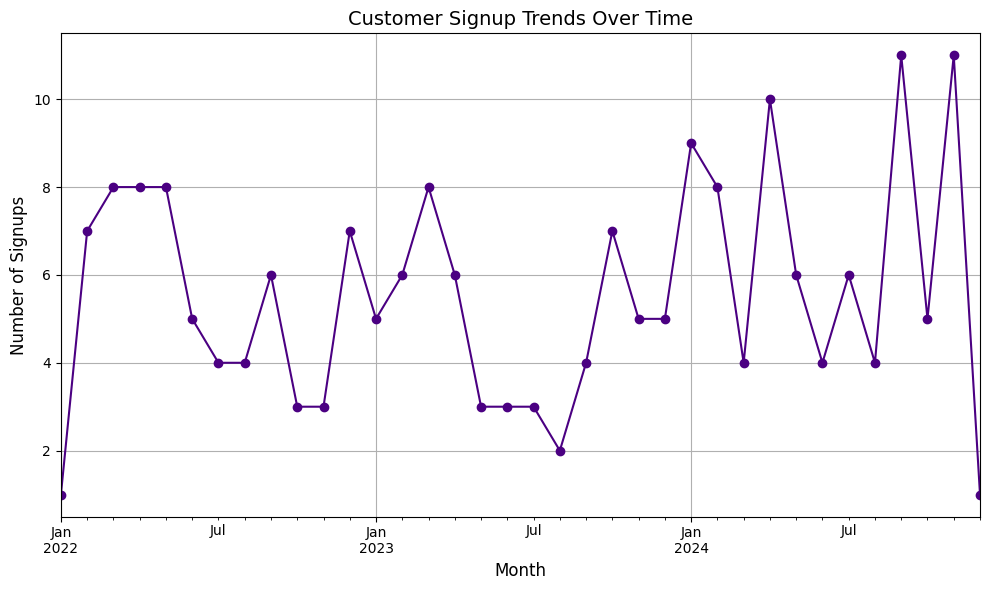

Insight 5: Signup trends indicate consistent growth with notable spikes, likely driven by targeted campaigns or seasonal factors.


In [ ]:
print("\n--- Advanced Insights ---")

# Insight 1: Regional dominance
most_customers_region = region_counts.idxmax()
print(f"Insight 1: The region with the highest number of customers is {most_customers_region}, contributing {region_counts.max()} customers.")

# Insight 2: Top-performing product
most_popular_product = product_sales.idxmax()
print(f"Insight 2: The top-performing product is '{most_popular_product}', selling {product_sales.max()} units.")

# Insight 3: Seasonal revenue trends
peak_revenue_month = monthly_revenue.idxmax()
print(f"Insight 3: The highest revenue was recorded in {peak_revenue_month}, suggesting seasonal purchasing behavior.")

# Insight 4: Transaction value benchmark
average_transaction_value = transactions['TotalValue'].mean()
print(f"Insight 4: The average transaction value is approximately ${average_transaction_value:.2f}, which can serve as a benchmark for revenue optimization strategies.")

# Insight 5: Customer signup analysis
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='indigo')
plt.title("Customer Signup Trends Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('Signup_Trends.png')
plt.show()
print("Insight 5: Signup trends indicate consistent growth with notable spikes, likely driven by targeted campaigns or seasonal factors.")

